# Assignment - 10

### Data Analytics III

<ol>
<li>Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv
dataset.</li>
<li>Compute Confusion Matrix to find TP, TN, FP, FN, Accuracy, Error Rate, Precision, Recall on the given dataset</li>
</ol>

#### Importing Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix


#### Loading Iris dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Checking for null values

In [5]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Counting values in each category

In [6]:
dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
numeric_cols = list(dataset.drop(['Species'], axis =1).columns)
print(numeric_cols)
z = np.abs(zscore(dataset[numeric_cols]))
threshold = 3
dataset = dataset[(z<=3).all(axis = 1)]

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [8]:
X = dataset.drop(['Id','Species'],axis = 1)
y = dataset['Species']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
data_X = pd.DataFrame(X,columns = ['SL','SW','PL','PW'])
data_X.head()

,SL,SW,PL,PW
0,-0.898927,1.085374,-1.352896,-1.320511
1,-1.140478,-0.107257,-1.352896,-1.320511
2,-1.382029,0.369796,-1.409888,-1.320511
3,-1.502804,0.131269,-1.295904,-1.320511
4,-1.019702,1.323900,-1.352896,-1.320511


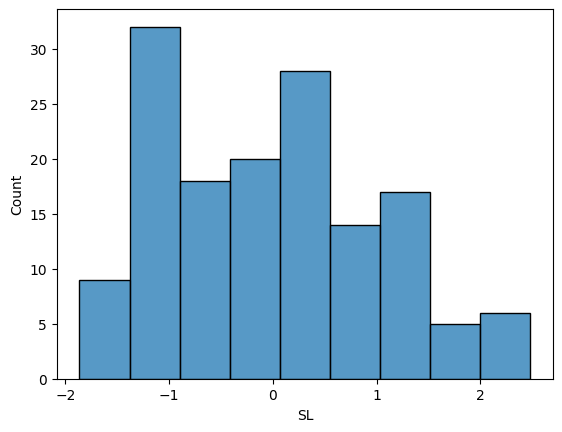

In [10]:
sns.histplot(data_X['SL']) # type: ignore
plt.show()

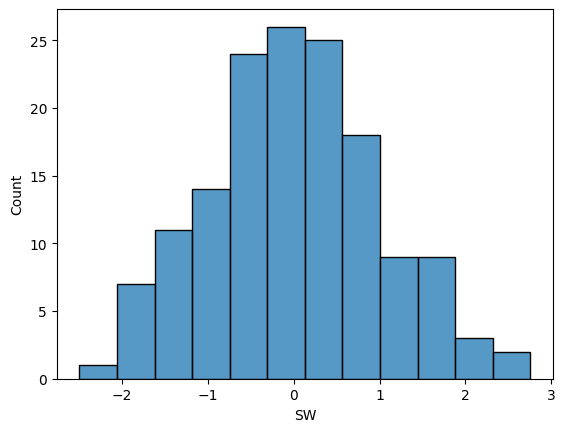

In [11]:
sns.histplot(data_X['SW']) # type: ignore
plt.show()

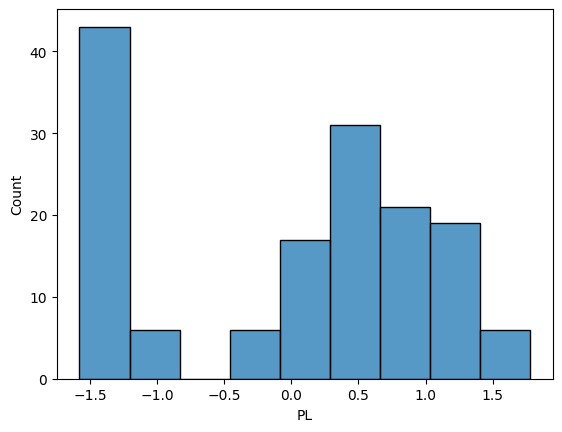

In [12]:
sns.histplot(data_X['PL']) # type: ignore
plt.show()

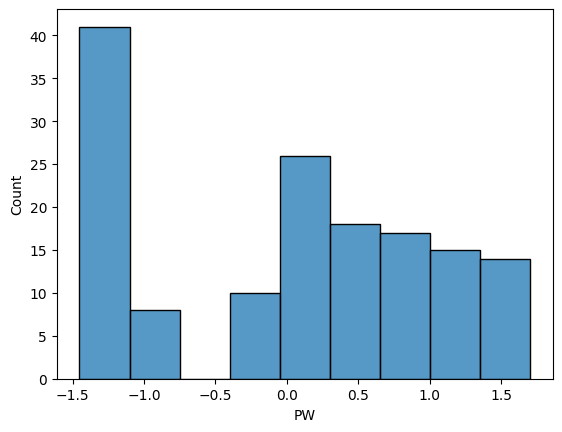

In [13]:
sns.histplot(data_X['PW']) # type: ignore
plt.show()

In [14]:
y.shape

(149,)

In [15]:
X.shape

(149, 4)

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .25, random_state = 24)

In [17]:
y_train.shape

(111,)

In [18]:
gnb_model = GaussianNB()

In [19]:
gnb_model.fit(X_train,y_train)
prediction = gnb_model.predict(X_test)

In [20]:
labels = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

In [21]:
from sklearn.metrics import classification_report
nb_acc = accuracy_score(prediction,y_test)
nb_precision = precision_score(prediction,y_test,average = 'macro')
nb_recall = recall_score(prediction,y_test,average = 'macro')
nb_f1_score = f1_score(prediction,y_test,average = 'macro')
cm = confusion_matrix(y_test,prediction,labels = labels)
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.95        38
      macro avg       0.96      0.94      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [22]:
print("Accuracy score: ",nb_acc)
print("Precision score: ",nb_precision)
print("Recall: ",nb_recall)
print("f1 score: ",nb_f1_score)

Accuracy score:  0.9473684210526315
Precision score:  0.9444444444444445
Recall:  0.9607843137254902
f1 score:  0.9488636363636364


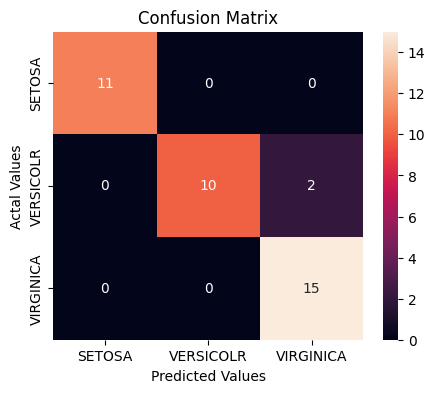

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
print("Calculation based on confusion matrix\n")
print('Outcome values : n\n',cm)

Calculation based on confusion matrix

Outcome values : n
 [[11  0  0]
 [ 0 10  2]
 [ 0  0 15]]


In [25]:
TP_0 = cm[0,0]
TP_1 = cm[1,1]
TP_2 = cm[2,2]
FN_0 = cm[0,1]+ cm[0,2]
FN_1 = cm[1,0] + cm[1,2]
FN_2 = cm[2,0] + cm[2,1]
FP_0 = cm[1,0] + cm[2,0]
FP_1 = cm[0,1] + cm[2,1]
FP_2 = cm[0,2] + cm[1,2]
TN_0 = cm[1,1] +cm[2,1]+ cm[2,2] +cm[1,2]
TN_1 = cm[0,0] + cm[0,2] +cm[2,0] + cm[2,2]
TN_2 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

In [26]:
print('True positives for SETOSA,VERSICOLR,VIRGINICA:', TP_0,TP_1,TP_2)

True positives for SETOSA,VERSICOLR,VIRGINICA: 11 10 15


In [27]:
acc1 = (TP_0+TN_0)/(TP_0+TN_0+FP_0+FN_0)
print("Acc of setosa ", acc1)
acc2 = (TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1)
print("Acc of setosa ", acc2)
acc3 = (TP_2+TN_2)/(TP_2+TN_2+FP_2+FN_2)
print("Acc of setosa ", acc3)
avg_acc = (acc1+acc2+acc3)/3
print("Average accuracy:",avg_acc)

Acc of setosa  1.0
Acc of setosa  0.9473684210526315
Acc of setosa  0.9473684210526315
Average accuracy: 0.9649122807017543


In [28]:
prec1 = (TP_0)/(TP_0+FP_0)
print("Precision of setosa ", prec1)
prec2 = (TP_1)/(TP_1+FP_1)
print("Precision of setosa ", prec2)
prec3 = (TP_2)/(TP_2+FP_2)
print("Precision of setosa ", prec3)

Precision of setosa  1.0
Precision of setosa  1.0
Precision of setosa  0.8823529411764706


In [29]:
rec1 = (TP_0)/(TP_0+FN_0)
print("Recall of setosa ", rec1)
rec2 = (TP_1)/(TP_1+FN_1)
print("Recall of setosa ", rec2)
rec3 = (TP_2)/(TP_2+FN_2)
print("Recall of setosa ", rec3)

Recall of setosa  1.0
Recall of setosa  0.8333333333333334
Recall of setosa  1.0


In [30]:
f1score1 = 2*rec1*prec1/(rec1+prec1)
print("F1 Score of setosa ", f1score1)
f1score2 = 2*rec2*prec2/(rec2+prec2)
print("F1 Score of setosa ", f1score2)
f1score3 = 2*rec3*prec3/(rec3+prec3)
print("F1 Score of setosa ", f1score3)

F1 Score of setosa  1.0
F1 Score of setosa  0.9090909090909091
F1 Score of setosa  0.9375


In [31]:
TP = TP_0+TP_1+TP_2
TN = TN_0+TN_1+TN_2
FP = FP_0+FP_1+FP_2
FN = FN_0+FN_1+FN_2
print("TP TN FP FN", TP,TN,FP,FN)

TP TN FP FN 36 74 2 2


In [32]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

0.9649122807017544


In [33]:
precision = TP/(TP+FP)
print("Precision: ", precision)

Precision:  0.9473684210526315


In [34]:
recall = TP /(TP+FN)
print("Recall: ",recall)

Recall:  0.9473684210526315


In [35]:
error_rate = (FP+FN)/(TP+TN+FP+FN)
print("Error rate = ", error_rate)

Error rate =  0.03508771929824561


In [36]:
true_neg_rate = TN/(TN+FP)
false_pos_rate = FP/(TN+FP)
print("Specificity or true negative rate : ",true_neg_rate)
print("False positive rate : ",false_pos_rate)

Specificity or true negative rate :  0.9736842105263158
False positive rate :  0.02631578947368421


In [37]:
f1score = 2*(precision*recall)/(precision+recall)
print("F1-score: ",f1score)

F1-score:  0.9473684210526315
